In [1]:
%load_ext autoreload

%autoreload 2

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

C:\Users\Conor\Anaconda3\lib\importlib\_bootstrap.py:219: ImportWarning: can't resolve package from __spec__ or __package__, falling back on __name__ and __path__
  return f(*args, **kwds)
C:\Users\Conor\Anaconda3\lib\importlib\_bootstrap.py:219: ImportWarning: can't resolve package from __spec__ or __package__, falling back on __name__ and __path__
  return f(*args, **kwds)


In [3]:
file_place = r"C:\Users\Conor\DataSets"

Breast_DF = pd.read_pickle(file_place + r"\Breast_data_raw")

In [4]:
Breast_DF.head()

912   \
Sex Type      Stage Pathology                 Grade Label Age Core             
F   Malignant IIa   Invasive ductal carcinoma 1     Blood 40  B4    0.094676   
                                                              B4    0.094676   
                                                              B4    0.095110   
                                                              B4    0.095979   
                                                              B4    0.097282   

                                                                        916   \
Sex Type      Stage Pathology                 Grade Label Age Core             
F   Malignant IIa   Invasive ductal carcinoma 1     Blood 40  B4    0.093373   
                                                              B4    0.093808   
                                                              B4    0.093808   
                                                              B4    0.095110   
                                                              B4    0.095979   

                                                                        920   \
Sex Type      Stage Pathology                 Grade Label Age Core             
F   Malignant IIa   Invasive ductal carcinoma 1     Blood 40  B4    0.095110   
                                                              B4    0.095110   
                                                              B4    0.095545   
                                                              B4    0.096848   
                                                              B4    0.097716   

                                                                        924   \
Sex Type      Stage Pathology                 Grade Label Age Core             
F   Malignant IIa   Invasive ductal carcinoma 1     Blood 40  B4    0.095545   
                                                              B4    0.095545   
                                                              B4    0.095979   
                                                              B4    0.097282   
                                                              B4    0.099019   

                                                                        928   \
Sex Type      Stage Pathology                 Grade Label Age Core             
F   Malignant IIa   Invasive ductal carcinoma 1     Blood 40  B4    0.096848   
                                                              B4    0.096848   
                                                              B4    0.097282   
                                                              B4    0.098151   
                                                              B4    0.099888   

                                                                        932   \
Sex Type      Stage Pathology                 Grade Label Age Core             
F   Malignant IIa   Invasive ductal carcinoma 1     Blood 40  B4    0.097282   
                                                              B4    0.097282   
                                                              B4    0.097716   
                                                              B4    0.099019   
                                                              B4    0.100322   

                                                                        936   \
Sex Type      Stage Pathology                 Grade Label Age Core             
F   Malignant IIa   Invasive ductal carcinoma 1     Blood 40  B4    0.095979   
                                                              B4    0.096848   
                                                              B4    0.096848   
                                                              B4    0.097716   
                                                              B4    0.099019   

                                                                        940   \
Sex Type      Stage Pathology                 Grade Label Age Cor

In [5]:
from sklearn.pipeline import Pipeline, FeatureUnion
from sklearn.preprocessing import Normalizer, StandardScaler, MinMaxScaler, RobustScaler

steps = [
         #("Normalise", Normalizer(norm = "l1"))
         ("RobustScaler", RobustScaler())
        ]

pipe  = Pipeline(steps)

C:\Users\Conor\Anaconda3\lib\importlib\_bootstrap.py:219: ImportWarning: can't resolve package from __spec__ or __package__, falling back on __name__ and __path__
  return f(*args, **kwds)
C:\Users\Conor\Anaconda3\lib\importlib\_bootstrap.py:219: ImportWarning: can't resolve package from __spec__ or __package__, falling back on __name__ and __path__
  return f(*args, **kwds)
C:\Users\Conor\Anaconda3\lib\importlib\_bootstrap.py:219: ImportWarning: can't resolve package from __spec__ or __package__, falling back on __name__ and __path__
  return f(*args, **kwds)
C:\Users\Conor\Anaconda3\lib\importlib\_bootstrap.py:219: ImportWarning: can't resolve package from __spec__ or __package__, falling back on __name__ and __path__
  return f(*args, **kwds)
C:\Users\Conor\Anaconda3\lib\site-packages\scipy\_lib\_numpy_compat.py:10: DeprecationWarning: Importing from numpy.testing.nosetester is deprecated, import from numpy.testing instead.
  from numpy.testing.nosetester import import_nose
C:\Users

In [7]:
import Tissue_Analysis_Tools as TAT

PCA_NR_Components = 50

dataframe = TAT.process_data(Breast_DF, paraffin = (1340,1490))#, balance = "Grade")

PCA_reduced = TAT.clean_spectra(dataframe, PCA_NR_Components)

values = pipe.fit_transform(PCA_reduced)

Breast_DF_P = pd.DataFrame(values, index = dataframe.index, columns = dataframe.columns)

C:\Users\Conor\Documents\Projects\Biospec_Analysis\Tissue_Analysis_Tools.py:298: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  input_dataframe.drop(input_dataframe.iloc[:,paraffin_index[0]:paraffin_index[1]].columns, axis = 1, inplace = True)
C:\Users\Conor\Documents\Projects\Biospec_Analysis\Tissue_Analysis_Tools.py:282: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  values = np.add(filtered, np.mean(input_spectra, axis = 0).reshape(1,-1))


In [ ]:
plt.clf()

#Breast_DF.mean(axis = 0, numeric_only  = True).plot(label = "Unprocessed")
#PCA_reduced.mean(axis = 0, numeric_only = True).plot(label = "Processed")

Breast_DF.iloc[0,:].plot(label = "U")
PCA_reduced.iloc[0,:].plot(label = "P")

P = PCA_reduced.iloc[0,:]

O = Breast_DF.loc[P.name]#, PCA_reduced.iloc[0,:]

(O-P).plot(label = "Difference")

plt.grid()
plt.xlabel("Wavenumber $(cm^{-1})$")
plt.ylabel("Absorbance")
plt.gca().invert_xaxis()
plt.legend()
plt.show()

In [184]:
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
import xgboost as xgb

from sklearn.model_selection import KFold, GroupKFold, GroupShuffleSplit

from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

In [325]:
Breast_DF_P.index.names

FrozenList(['Sex', 'Type', 'Stage', 'Pathology', 'Grade', 'Label', 'Age', 'Core'])

In [358]:
Breast_DF_P.head()

1000  \
Sex Type Stage Pathology                            Grade Label                    Age Core             
F   NAT  -     Cancer adjacent normal breast tissue -     Non_malignant Stroma     46  M9    0.056582   
                                                                                   49  M3   -0.045732   
                                                                                   51  M8   -0.062541   
                                                                                   50  M11  -0.205840   
                                                          Non_malignant Epithelium 45  M1   -0.188496   

                                                                                                 1004  \
Sex Type Stage Pathology                            Grade Label                    Age Core             
F   NAT  -     Cancer adjacent normal breast tissue -     Non_malignant Stroma     46  M9    0.055855   
                                                                                   49  M3   -0.051079   
                                                                                   51  M8   -0.052252   
                                                                                   50  M11  -0.177804   
                                                          Non_malignant Epithelium 45  M1   -0.199115   

                                                                                                 1008  \
Sex Type Stage Pathology                            Grade Label                    Age Core             
F   NAT  -     Cancer adjacent normal breast tissue -     Non_malignant Stroma     46  M9    0.087547   
                                                                                   49  M3   -0.022998   
                                                                                   51  M8   -0.029339   
                                                                                   50  M11  -0.132087   
                                                          Non_malignant Epithelium 45  M1   -0.176720   

                                                                                                 1012  \
Sex Type Stage Pathology                            Grade Label                    Age Core             
F   NAT  -     Cancer adjacent normal breast tissue -     Non_malignant Stroma     46  M9    0.097514   
                                                                                   49  M3   -0.012415   
                                                                                   51  M8   -0.044320   
                                                                                   50  M11  -0.138475   
                                                          Non_malignant Epithelium 45  M1   -0.182231   

                                                                                                 1016  \
Sex Type Stage Pathology                            Grade Label                    Age Core             
F   NAT  -     Cancer adjacent normal breast tissue -     Non_malignant Stroma     46  M9    0.092090   
                                                                                   49  M3   -0.015034   
                                                                                   51  M8   -0.076889   
                                                                                   50  M11  -0.151006   
                                                          Non_malignant Epithelium 45  M1   -0.180402   

                                                                                                 1020  \
Sex Type Stage Pathology                            Grade Label                    Age Core             
F   NAT  -     Cancer adjacent normal breast tissue -     Non_malignant Stroma     46  M9    0.083516   
                                                                                   49  M3    0.014914 

In [365]:
sample = Breast_DF_P#.sample(100)

pred_label = "Grade"

wn = 2

X = sample.iloc[:,np.arange(0, len(Breast_DF_P.columns), wn)]
y = sample.reset_index()[pred_label]

print(y.value_counts())

classifier_Results = []
importance_spectra = dict()

classifiers = {
              #"RF_10_Trees": RandomForestClassifier(n_estimators = 10, n_jobs = -1)
              #,"RF_100_Trees": RandomForestClassifier(n_estimators = 100, n_jobs = -1)
              # "RF_500_Trees": RandomForestClassifier(n_estimators = 500, n_jobs = -1)
              "XGBoost": xgb.XGBClassifier(objective = "multi:softprob", num_class = len(np.unique(y))
                                           , n_jobs = -1, n_estimators = 500, max_delta_step = 1, ), 
              }

for name, clf in classifiers.items():
    
    stats = []
    
    #Array to store importance spectra for each repeat
    spectra_repeat = []

    repeat_n = 0
    
    #for train_i, test_i in KFold(n_splits = 2, shuffle = True).split(X):
    for train_i, test_i in GroupKFold(3).split(X, y, sample.reset_index()["Core"]):

        repeat_n = repeat_n + 1
        
        print("Repeat: {}".format(repeat_n))

        X_train, X_test = X.iloc[train_i], X.iloc[test_i]
        y_train, y_test = y[train_i], y[test_i]

        clf.fit(X_train, y_train)

        conf_mat = confusion_matrix(y_test, clf.predict(X_test), labels = np.unique(y))
        df = conf_mat_analyse(conf_mat, pred_label, labels = np.unique(y))
        df["Repeat_N"] = repeat_n

        stats.append(df)
        
        # Append to the list of repeats for that classifier
        spectra_repeat.append(clf.feature_importances_)
        
    spectra_repeat = np.array(spectra_repeat)
    
    # Append the importance spectra for each classifier name, taking mean and std.dev. Store in a pandas dataframe
    importance_spectra.update({name: pd.DataFrame([spectra_repeat.mean(axis = 0), spectra_repeat.std(axis = 0)]
                                                  , index = ["Mean","std.dev"]
                                                  , columns = X.columns)})
    
    
    results = pd.concat(stats).set_index(["Repeat_N",pred_label])

    means = results.mean(level = pred_label)
    stds = results.std(level = pred_label)

    results = means.merge(stds, left_index = True, right_index =  True, suffixes = ["_Mean", "_Std"])
    
    results["Classifier"] = name
    
    classifier_Results.append(results)

classifier_Results = pd.concat(classifier_Results).reset_index().set_index(["Classifier",pred_label])

2       64
2--3    64
1       64
3       64
-       64
Name: Grade, dtype: int64
Repeat: 1


C:\Users\Conor\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


Repeat: 2


C:\Users\Conor\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


Repeat: 3


C:\Users\Conor\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


In [367]:
classifier_Results.round(2)

TP_Mean  TN_Mean  FP_Mean  FN_Mean  Acc_Mean  Sens_Mean  \
Classifier Grade                                                            
XGBoost    -         7.33    70.67    14.67    14.00     73.10        NaN   
           1         6.33    71.33    14.00    15.00     72.79        NaN   
           2         6.33    41.33    44.00    15.00     44.72        NaN   
           2--3      0.00    72.33    13.00    21.33     67.83        NaN   
           3         0.00    84.33     1.00    21.33     79.12        NaN   

                  Spec_Mean  TP_Std  TN_Std  FP_Std  FN_Std  Acc_Std  \
Classifier Grade                                                       
XGBoost    -          83.46    2.31   12.22   12.50   11.79     9.66   
           1          84.31    4.73   15.95    9.00   15.87    10.25   
           2          48.36    2.31   18.90   18.25    3.46    18.56   
           2--3       87.77    0.00   27.30   14.73   36.95    25.58   
           3          99.06    0.00   35.81    1.00   36.95    33.72   

                  Sens_Std  Spec_Std  
Classifier Grade                      
XGBoost    -           NaN     12.00  
           1           NaN      9.00  
           2           NaN     21.51  
           2--3        NaN     13.91  
           3           NaN      0.94

In [332]:
import itertools

def conf_mat_analyse(conf_mat, column_title, labels):
    
    stats = dict()
    stats = []
    
    n_classes = conf_mat.shape[0]
    
    for i, name in enumerate(labels):
        #todo add assert statement to ensure at least 1 example of each class

        TP = conf_mat[i,i]
        FP = np.sum(conf_mat[:,i]) - TP
        FN = np.sum(conf_mat[i,:]) - TP
        TN = np.sum(conf_mat) - TP - FP - FN

        stats.append([name,TP,TN,FP,FN])
        
    df = pd.DataFrame(stats, columns = [column_title,"TP","TN","FP","FN"])
    
    df["Acc"] = df.apply(lambda row: (row["TP"] + row["TN"])/(row["TP"] + row["TN"] + row["FP"] + row["FN"])*100, axis = 1)

    try: df["Sens"] = df.apply(lambda row: row["TP"]/(row["TP"] + row["FN"])*100, axis = 1)
        
    except: df["Sens"] = np.nan # Outputs NaN where there are no positive cases
        
    df["Spec"] = df.apply(lambda row: row["TN"]/(row["TN"] + row["FP"])*100, axis = 1)
    
    return df

In [145]:
import itertools

def conf_mat_analyse(conf_mat, labels):
    
    stats = dict()
    stats = []
    
    n_classes = conf_mat.shape[0]
    
    for i, name in enumerate(labels):
        #todo add assert statement to ensure at least 1 example of each class
        
        TP = conf_mat[i,i]
        FP = np.sum(conf_mat[:,i]) - TP
        FN = np.sum(conf_mat[i,:]) - TP
        TN = np.sum(conf_mat) - TP - FP - FN

        stats.append([name,TP,TN,FP,FN])
        
    df = pd.DataFrame(stats, columns = ["Label","TP","TN","FP","FN"])
    
    df["Acc"] = df.apply(lambda row: (row["TP"] + row["TN"])/(row["TP"] + row["TN"] + row["FP"] + row["FN"])*100, axis = 1)
    df["Sens"] = df.apply(lambda row: row["TP"]/(row["TP"] + row["FN"])*100, axis = 1)
    df["Spec"] = df.apply(lambda row: row["TN"]/(row["TN"] + row["FP"])*100, axis = 1)
    
    return df

In [226]:
Breast_DF_P.mean().loc[1336]

0.004604786714343125

C:\Users\Conor\Anaconda3\lib\site-packages\matplotlib\font_manager.py:1316: UserWarning: findfont: Font family ['normal'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


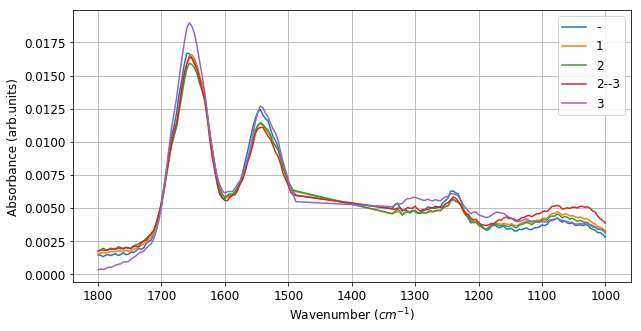

In [354]:
plt.clf()
plt.figure(figsize = (10,5))

for name, df in Breast_DF_P.groupby(level = "Grade"):
    
    plt.plot(df.mean(axis = 0), label = name)

plt.gca().invert_xaxis()
plt.grid()
plt.legend()
plt.xlabel("Wavenumber $(cm^{-1})$")
plt.ylabel("Absorbance (arb.units)")
plt.show()